# Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm

# Load Cleaned Data

In [2]:
filePath = os.path.join('Data','Stage','NoShowAppointments_cleaned.csv')
df = pd.read_csv(filePath,low_memory=False)

# Build data to model

In [3]:
X = df.drop('NoShow', axis=1)
y = df['NoShow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

#Use model to predict
y_pred = logmodel.predict(X_test)

#Evaluate accuracy of the model
acc_log = round(logmodel.score(X_test, y_test) * 100, 2)
acc_log

80.06

# Decision Tree

In [7]:
# Decision Tree
#########
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

#Use model to predict
y_pred = dtree.predict(X_test)

#Evaluate accuracy of the model
acc_dtree = round(dtree.score(X_test, y_test) * 100, 2)
acc_dtree

95.02

# Random Forest

In [14]:
# Random Forest
#########
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=101, n_jobs=-1, verbose=3)
rfc.fit(X_train, y_train)

#Use model to predict
y_pred = rfc.predict(X_test)

#Evaluate accuracy of the model
acc_rf = round(rfc.score(X_test, y_test) * 100, 2)
acc_rf

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s


building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.5s


building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200building tree 143 of 200

building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.4s finished


87.64

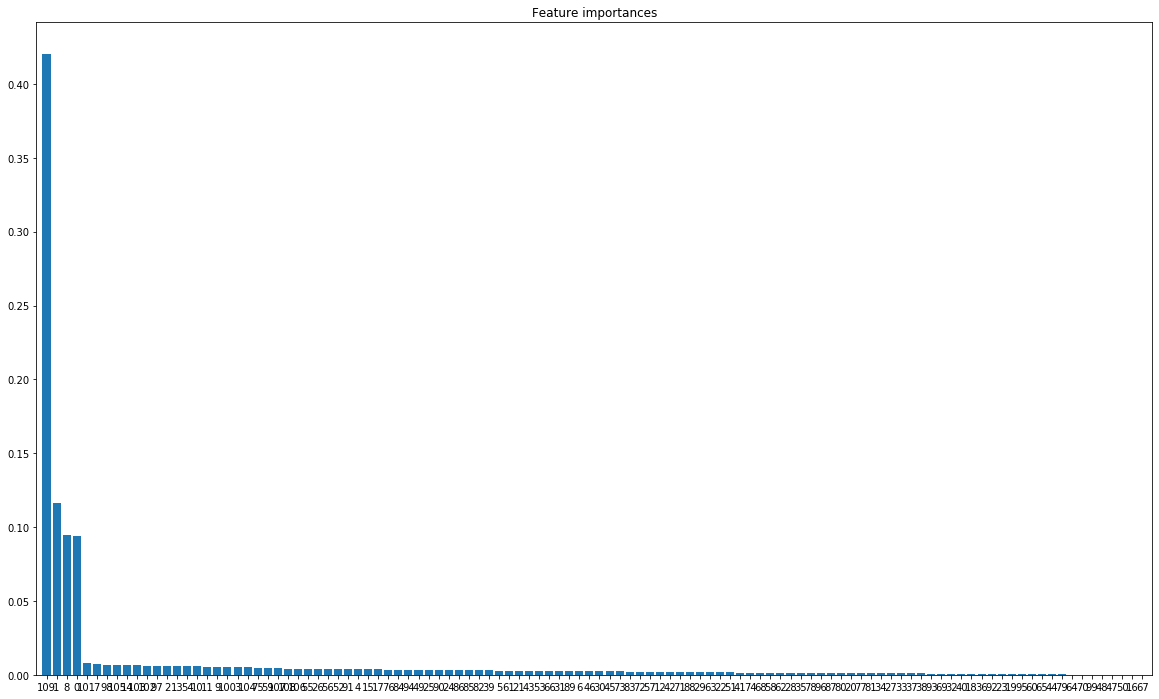

In [14]:
#Evaluate feature importance
importances = rfr.feature_importances_
std = np.std([importances for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

feature_importances = pd.DataFrame(rfr.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(20,12))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Light GBM

In [15]:
#########
# lightGBM (LGBM)
#########
import lightgbm as lgb
#create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

#specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

#train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

#save model to file
gbm.save_model('model.txt')

#predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

[1]	valid_0's l2: 0.151696	valid_0's l1: 0.313335
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.1445	valid_0's l1: 0.305512
[3]	valid_0's l2: 0.138023	valid_0's l1: 0.298088
[4]	valid_0's l2: 0.132178	valid_0's l1: 0.29105
[5]	valid_0's l2: 0.126902	valid_0's l1: 0.284353
[6]	valid_0's l2: 0.122157	valid_0's l1: 0.278016
[7]	valid_0's l2: 0.117876	valid_0's l1: 0.271991
[8]	valid_0's l2: 0.114012	valid_0's l1: 0.266262
[9]	valid_0's l2: 0.110525	valid_0's l1: 0.260809
[10]	valid_0's l2: 0.107379	valid_0's l1: 0.255641
[11]	valid_0's l2: 0.104503	valid_0's l1: 0.250699
[12]	valid_0's l2: 0.101907	valid_0's l1: 0.245995
[13]	valid_0's l2: 0.0995555	valid_0's l1: 0.241509
[14]	valid_0's l2: 0.0992671	valid_0's l1: 0.240972
[15]	valid_0's l2: 0.0971875	valid_0's l1: 0.236759
[16]	valid_0's l2: 0.0953493	valid_0's l1: 0.232799
[17]	valid_0's l2: 0.0936701	valid_0's l1: 0.229008
[18]	valid_0's l2: 0.0921494	valid_0's l1: 0.225405
[19]	valid_0's l2: 0.0907788

# XGBOOST

In [16]:
#########
# XGBoost
#########
import xgboost as xgb

model = xgb.XGBClassifier(random_state=1, n_estimators=1000, learning_rate=0.01, n_jobs=-1) #for the best model, high number of estimators, low learning rate
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.8770082798705927

# Auto-ML

In [28]:
# prepare files for Auto-ML

#divide dataframe into test and train
test_perc = .33
test = int(df.shape[0] * test_perc)
train = df.shape[0] - test

#fail if length doesn't equal test + train
assert df.shape[0] == test + train

#create file paths for test and train files
filePathTrain = os.path.join('Data','Stage','Appointment_Cleaned_train.csv')
filePathTest = os.path.join('Data','Stage','Appointment_Cleaned_test.csv')

#add files to Stage Folder
df[:train].to_csv(filePathTrain,index=False)
df[:test].to_csv(filePathTest,index=False)

In [11]:
import h2o
from h2o.automl import H2OAutoML, get_leaderboard

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /home/narquette/anaconda3/envs/capstone/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmph0f1wl56
  JVM stdout: /tmp/tmph0f1wl56/h2o_narquette_started_from_python.out
  JVM stderr: /tmp/tmph0f1wl56/h2o_narquette_started_from_python.err
  Server is running at http://127.0.0.1:54347
Connecting to H2O server at http://127.0.0.1:54347 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/GMT
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month and 11 days
H2O cluster name:,H2O_from_python_narquette_p0rtyl
H2O cluster total nodes:,1
H2O cluster free memory:,7.971 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


In [29]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file(filePathTrain)
test = h2o.import_file(filePathTest)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [30]:
# Identify predictors and response
x = train.columns
y = "NoShow"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# AutoML Leaderboard
lb = aml.leaderboard

# Optionally edd extra model information to the leaderboard
lb = get_leaderboard(aml, extra_columns='ALL')

# Print all rows (instead of default 10 rows)
lb.head(rows=lb.nrows)

# model_id                                                  auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms
# ---------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------
# StackedEnsemble_AllModels_AutoML_20191213_174603     0.789844   0.551067  0.804672                0.314665  0.432045  0.186663                 924                   0.05695
# StackedEnsemble_BestOfFamily_AutoML_20191213_174603  0.789768   0.550906  0.805696                0.313059  0.431977  0.186604                 639                   0.024567
# XGBoost_grid__1_AutoML_20191213_174603_model_4       0.784698   0.55681   0.80312                 0.323143  0.434743  0.189002                3092                   0.002083
# XGBoost_3_AutoML_20191213_174603                     0.784232   0.557749  0.802341                0.317933  0.434976  0.189204                2878                   0.002173
# XGBoost_2_AutoML_20191213_174603                     0.783533   0.555997  0.803189                0.32475   0.434678  0.188945                4635                   0.003292
# XGBoost_grid__1_AutoML_20191213_174603_model_3       0.782582   0.560218  0.800749                0.34334   0.435944  0.190047                2695                   0.002269
# GBM_5_AutoML_20191213_174603                         0.78219    0.558353  0.800234                0.319658  0.435512  0.18967                  768                   0.004318
# XGBoost_1_AutoML_20191213_174603                     0.781901   0.557944  0.801237                0.325446  0.435519  0.189676                4428                   0.003039
# XGBoost_grid__1_AutoML_20191213_174603_model_1       0.781648   0.561112  0.799203                0.312015  0.436434  0.190474                5430                   0.002557
# GBM_2_AutoML_20191213_174603                         0.777673   0.562514  0.796181                0.334056  0.437583  0.191479                 655                   0.003772
# GBM_1_AutoML_20191213_174603                         0.777294   0.562744  0.798244                0.356261  0.437727  0.191605                 700                   0.003571
# GBM_3_AutoML_20191213_174603                         0.775488   0.564794  0.793585                0.327971  0.438722  0.192477                 635                   0.003748
# XGBoost_grid__1_AutoML_20191213_174603_model_2       0.773621   0.578141  0.791949                0.341118  0.443963  0.197104                9722                   0.003896
# GBM_grid__1_AutoML_20191213_174603_model_1           0.772656   0.568314  0.79164                 0.332175  0.440049  0.193643                 647                   0.004546
# GBM_4_AutoML_20191213_174603                         0.77248    0.569483  0.791078                0.336913  0.440873  0.194369                 800                   0.004142
# DRF_1_AutoML_20191213_174603                         0.764975   0.5801    0.781588                0.336001  0.445222  0.198222                1399                   0.007475
# XRT_1_AutoML_20191213_174603                         0.759957   0.585158  0.776857                0.338976  0.447598  0.200344                1426                   0.00495
# GBM_grid__1_AutoML_20191213_174603_model_2           0.748007   0.632981  0.758833                0.375308  0.462237  0.213663                 588                   0.003119
# DeepLearning_grid__2_AutoML_20191213_174603_model_1  0.739884   0.600688  0.747948                0.359883  0.455205  0.207212               40408                   0.010939
# DeepLearning_1_AutoML_20191213_174603                0.700406   0.63169   0.70199                 0.395333  0.469084  0.22004                  445                   0.002288
# DeepLearning_grid__1_AutoML_20191213_174603_model_1  0.692235   0.671512  0.691883                0.409836  0.478393  0.22886                32546                   0.003623
# GLM_1_AutoML_20191213_174603                         0.682648   0.63852   0.680344                0.397234  0.472683  0.223429                 195                   0.001312
#
# [22 rows x 9 columns]


# The leader model is stored here
aml.leader

# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [31]:
preds

predict,p0,p1
0,0.985297,0.0147028
0,0.985385,0.0146155
0,0.98525,0.0147501
0,0.968508,0.0314922
0,0.985297,0.0147028
0,0.985038,0.0149619
1,0.248297,0.751703
1,0.206862,0.793138
0,0.985172,0.0148283
0,0.984654,0.0153457


In [32]:
lb.head(rows=lb.nrows)


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_BestOfFamily_AutoML_20200317_032455,0.943297,0.245454,0.758808,0.108607,0.281634,0.0793177,7140,0.078132
XGBoost_grid__1_AutoML_20200317_032455_model_2,0.94313,0.235525,0.758046,0.107381,0.281361,0.0791638,47143,0.011772
StackedEnsemble_AllModels_AutoML_20200317_032455,0.943014,0.244461,0.758509,0.104405,0.281549,0.0792696,24738,0.31064
GBM_4_AutoML_20200317_032455,0.94157,0.230725,0.749575,0.110835,0.280157,0.0784881,21474,0.031396
XGBoost_1_AutoML_20200317_032455,0.940666,0.23162,0.745705,0.103897,0.280845,0.078874,19534,0.004995
XGBoost_2_AutoML_20200317_032455,0.94031,0.233002,0.742554,0.10991,0.281705,0.0793574,27184,0.007121
GBM_3_AutoML_20200317_032455,0.940233,0.232192,0.744067,0.105896,0.281174,0.0790587,20265,0.030576
GBM_grid__1_AutoML_20200317_032455_model_1,0.940049,0.232702,0.744058,0.104688,0.281285,0.0791211,17286,0.052838
GBM_5_AutoML_20200317_032455,0.939442,0.233594,0.740423,0.107083,0.282254,0.0796675,24563,0.031579
DRF_1_AutoML_20200317_032455,0.939355,0.253382,0.743092,0.104143,0.285449,0.0814809,10302,0.017074
